# Regresión lineal: motivación

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4.5, 3]

## El problema

Tenemos 100 estudiantes, de los que sabemos:
 * el número de horas que estudiaron para su examen
 * la nota que obtuvieron (de 0 a 100)

In [12]:
data = pd.read_csv("./datasets/hours_vs_mark.csv")

In [13]:
data.shape

(100, 2)

In [14]:
data.head()

,horas,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


Nos gustaría entender la relación $$nota = f(horas)$$

de manera que podamos **predecir la nota esperada** que obtendremos estudiando un determinado número de horas

## Exploración del data

In [15]:
data.head()

,horas,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


<Axes: xlabel='horas', ylabel='Count'>

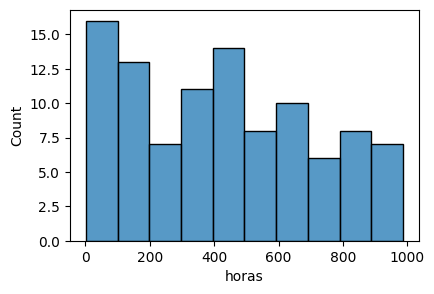

In [21]:
sns.histplot(data.horas, binwidth=100)

<Axes: xlabel='nota', ylabel='Count'>

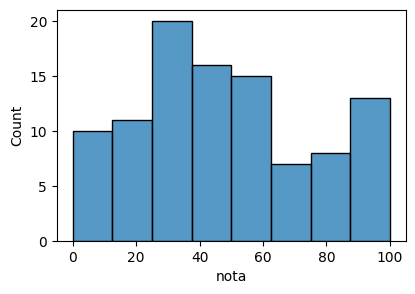

In [22]:
sns.histplot(data.nota)

In [24]:
data.corr().round(3)

,horas,nota
horas,1.000,0.867
nota,0.867,1.000


<Axes: xlabel='horas', ylabel='nota'>

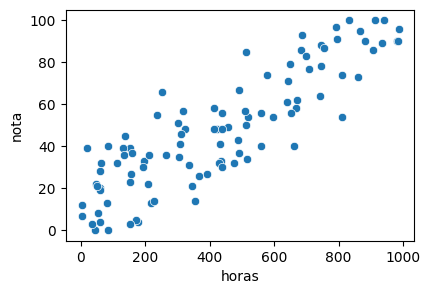

In [23]:
sns.scatterplot(x=data.horas, y=data.nota)

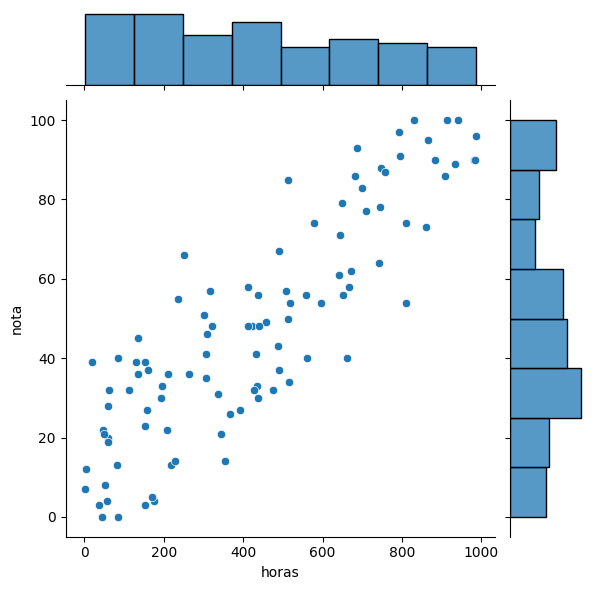

In [25]:
sns.jointplot(x=data.horas, y=data.nota)

## El modelo lineal

Probemos con una relación lineal, $$Y = m * X + n$$

$m$ es la pendiente  
$n$ es el valor de $Y$ cuando $X=0$ 

<Axes: xlabel='horas', ylabel='nota'>

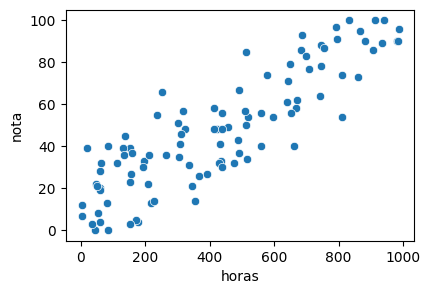

In [23]:
sns.scatterplot(x=data.horas, y=data.nota)

$$nota = m * horas + n$$

Queremos encontrar los valores de $m$ and $n$ que *mejor* modelan nuestros datos

Conjeturemos:

$$nota = 0.1 * horas$$

$$nota_2 = 0.09 * horas + 10$$

Qué modelo lo hace mejor?

In [26]:
data.shape

(100, 2)

In [27]:
data.head()

,horas,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


$$nota = 0.1 * horas$$

$$nota_2 = 0.09 * horas + 10$$

In [28]:
data["prediction_1"] = data.horas * 0.1

In [29]:
data["prediction_2"] = data.horas * 0.09 + 10

In [30]:
data.head(10)

,horas,nota,prediction_1,prediction_2
0,865,95,86.5,87.85
1,4,12,0.4,10.36
2,305,35,30.5,37.45
3,437,56,43.7,49.33
4,682,86,68.2,71.38
5,560,40,56.0,60.40
6,367,26,36.7,43.03
7,861,73,86.1,87.49
8,59,20,5.9,15.31
9,514,85,51.4,56.26


In [31]:
# semi-random prediction
data["prediction_3"] = np.random.uniform(40, 60, size=data.shape[0]).round(2)

In [32]:
data.head(10)

,horas,nota,prediction_1,prediction_2,prediction_3
0,865,95,86.5,87.85,40.88
1,4,12,0.4,10.36,42.57
2,305,35,30.5,37.45,42.57
3,437,56,43.7,49.33,45.78
4,682,86,68.2,71.38,55.94
5,560,40,56.0,60.40,48.90
6,367,26,36.7,43.03,52.00
7,861,73,86.1,87.49,49.38
8,59,20,5.9,15.31,41.25
9,514,85,51.4,56.26,45.69


Qué hace a un modelo "mejor"?

Veamos cuál es el error de cada modelo

Utilizaremos el [error cuadrático medio](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio)

In [33]:
data['error_1'] = (data.nota - data.prediction_1) ** 2

In [34]:
data['error_2'] = (data.nota - data.prediction_2) ** 2

In [35]:
data['error_3'] = (data.nota - data.prediction_3) ** 2

In [36]:
data.head(10)

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,87.85,40.88,72.25,51.1225,2928.9744
1,4,12,0.4,10.36,42.57,134.56,2.6896,934.5249
2,305,35,30.5,37.45,42.57,20.25,6.0025,57.3049
3,437,56,43.7,49.33,45.78,151.29,44.4889,104.4484
4,682,86,68.2,71.38,55.94,316.84,213.7444,903.6036
5,560,40,56.0,60.40,48.90,256.00,416.1600,79.2100
6,367,26,36.7,43.03,52.00,114.49,290.0209,676.0000
7,861,73,86.1,87.49,49.38,171.61,209.9601,557.9044
8,59,20,5.9,15.31,41.25,198.81,21.9961,451.5625
9,514,85,51.4,56.26,45.69,1128.96,825.9876,1545.2761


In [37]:
data.error_1.mean().round(1)

234.8

In [38]:
data.error_2.mean().round(1)

192.3

In [39]:
data.error_3.mean().round(1)

759.8

Dibujemos las rectas de nuestros modelos

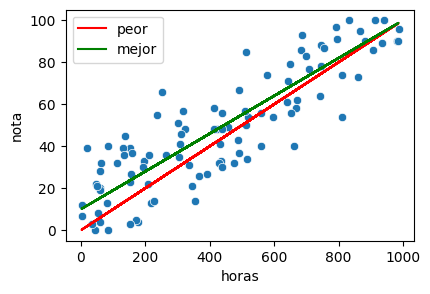

In [40]:
fig, ax = plt.subplots()
sns.scatterplot(x=data.horas, y=data.nota)

plt.plot(data.horas, data.prediction_1, color='r', label='peor')
plt.plot(data.horas, data.prediction_2, color='g', label='mejor')

plt.legend()

In [41]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,87.85,40.88,72.25,51.1225,2928.9744
1,4,12,0.4,10.36,42.57,134.56,2.6896,934.5249
2,305,35,30.5,37.45,42.57,20.25,6.0025,57.3049
3,437,56,43.7,49.33,45.78,151.29,44.4889,104.4484
4,682,86,68.2,71.38,55.94,316.84,213.7444,903.6036


### Entendiendo el error del modelo como una función de `m` y `n`

$$nota = m * horas + n$$

`L` significa Loss (la palabra que se utiliza como "error" en Data Science)

$$Error = L(m, n)$$

$$nota =0.1 * horas$$

$$L(0.1, 0) = 234$$

$$nota_2 =0.09 * horas + 10$$

$$L(0.09, 10) = 192$$

In [42]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,87.85,40.88,72.25,51.1225,2928.9744
1,4,12,0.4,10.36,42.57,134.56,2.6896,934.5249
2,305,35,30.5,37.45,42.57,20.25,6.0025,57.3049
3,437,56,43.7,49.33,45.78,151.29,44.4889,104.4484
4,682,86,68.2,71.38,55.94,316.84,213.7444,903.6036


Si llamamos:
 - $y_i$ a la nota real del estudiante $i$
 - $\hat{y_i}$ la nota predicha para el estudiante $i$  

El error es $$L(m, n) = \frac{1}{N} \sum (y_i - \hat{y_i})^2 = \frac{1}{N} \sum (y_i - (m * x_i + n))^2 $$

y siendo cuadrática en `m` y `n`, la función `L` tiene un mínimo global

## El modelo lineal óptimo

Podemos encontrar **el mejor** modelo lineal?

`scikit-learn` es una librería de Python para entrenar modelos

In [ ]:
!pip install scikit-learn

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr

LinearRegression()

In [49]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [50]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,87.85,40.88,72.25,51.1225,2928.9744
1,4,12,0.4,10.36,42.57,134.56,2.6896,934.5249
2,305,35,30.5,37.45,42.57,20.25,6.0025,57.3049
3,437,56,43.7,49.33,45.78,151.29,44.4889,104.4484
4,682,86,68.2,71.38,55.94,316.84,213.7444,903.6036


In [52]:
# train the model
# X predictors: 1 or more columns
# y target: 1 column
lr.fit(
    # X = data[["horas", "edad", "horasdesueño"]],
    X = data[["horas"]],
    y = data.nota,
)

LinearRegression()

$$nota = m * horas + n$$

In [53]:
# access coefficients m and n. it has 1 entry per predictor variable
lr.coef_

array([0.08437787])

Si tuviéramos 3 predictores en vez de uno, la función sería algo así:
$$nota = m_1 * horas + m_2 * edad + m_3 * horasdesueño + n$$

In [54]:
optimal_m = lr.coef_[0]

In [55]:
optimal_m

0.08437787096170372

In [56]:
optimal_n = lr.intercept_

In [57]:
optimal_n

11.78070717807148

$$nota = 0.0844*horas + 11.78$$

In [58]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,87.85,40.88,72.25,51.1225,2928.9744
1,4,12,0.4,10.36,42.57,134.56,2.6896,934.5249
2,305,35,30.5,37.45,42.57,20.25,6.0025,57.3049
3,437,56,43.7,49.33,45.78,151.29,44.4889,104.4484
4,682,86,68.2,71.38,55.94,316.84,213.7444,903.6036


In [59]:
data["best_prediction"] = (data.horas * optimal_m + optimal_n).round(2)

In [60]:
data["best_prediction_error"] = (data.best_prediction - data.nota) ** 2

In [61]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,best_prediction,best_prediction_error
0,865,95,86.5,87.85,40.88,72.25,51.1225,2928.9744,84.77,104.6529
1,4,12,0.4,10.36,42.57,134.56,2.6896,934.5249,12.12,0.0144
2,305,35,30.5,37.45,42.57,20.25,6.0025,57.3049,37.52,6.3504
3,437,56,43.7,49.33,45.78,151.29,44.4889,104.4484,48.65,54.0225
4,682,86,68.2,71.38,55.94,316.84,213.7444,903.6036,69.33,277.8889


In [62]:
data.best_prediction_error.mean()

189.308348

In [63]:
data.error_2.mean()

192.25725599999998

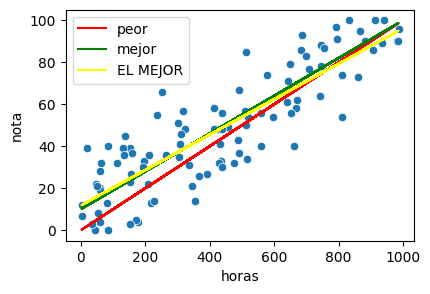

In [65]:
fig, ax = plt.subplots()
sns.scatterplot(x=data.horas, y=data.nota)

plt.plot(data.horas, data.prediction_1, color='r', label='peor')
plt.plot(data.horas, data.prediction_2, color='g', label='mejor')
plt.plot(data.horas, data.best_prediction, color='yellow', label='EL MEJOR')

plt.legend()

Utilizando nuestro modelo para hacer predicciones

In [66]:
n_horas = 750

$$nota = 0.0844*horas + 11.78$$

In [67]:
nota_esperada = optimal_m * n_horas + optimal_n

In [68]:
nota_esperada

75.06411039934927

In [71]:
lr.predict(np.array([[750]]))

/home/sheriff/teaching-env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75.0641104])

In [73]:
dff = pd.DataFrame({"age": [20, 30, 40, 50, 60, 70, 80], "prob_acc": [1, 0.7, 0.5, 0.4, 0.5, 0.7, 1]})

In [84]:
dff["age2"] = dff.age ** 2

In [87]:
dff

,age,prob_acc,age2
0,20,1.0,400
1,30,0.7,900
2,40,0.5,1600
3,50,0.4,2500
4,60,0.5,3600
5,70,0.7,4900
6,80,1.0,6400


<Axes: xlabel='age', ylabel='prob_acc'>

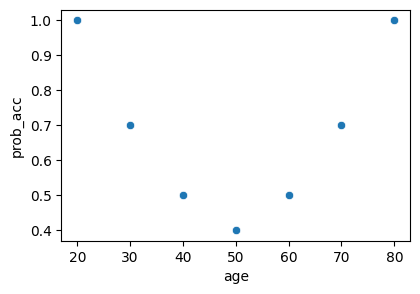

In [75]:
sns.scatterplot(x=dff.age, y=dff.prob_acc)

In [88]:
lr = LinearRegression()

In [89]:
lr.fit(X=dff[["age", "age2"]], y=dff.prob_acc)

LinearRegression()

In [91]:
lr.coef_

array([-0.06428571,  0.00064286])

Tenemos 2 predictores, la predicción es:
$$nota = -0.06 * age + 0.000643 * age ^2$$

In [92]:
dff["prediction"] = lr.predict(dff[["age", "age2"]])

In [93]:
dff

,age,prob_acc,age2,prediction
0,20,1.0,400,1.007143
1,30,0.7,900,0.685714
2,40,0.5,1600,0.492857
3,50,0.4,2500,0.428571
4,60,0.5,3600,0.492857
5,70,0.7,4900,0.685714
6,80,1.0,6400,1.007143


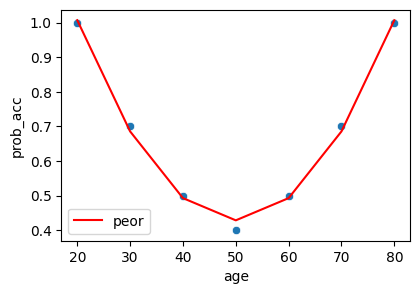

In [94]:
fig, ax = plt.subplots()
sns.scatterplot(x=dff.age, y=dff.prob_acc)

plt.plot(dff.age, dff.prediction, color='r', label='peor')

plt.legend()

## Alinea tu métrica apropiadamente con el caso de uso

**Motivación**: Somos una empresa que vende tupper de comida preparada cada semana

Tenemos que predecir el número de cajas de comida a preparar cada semana, y esperar que cuadre con la demanda

In [104]:
data2 = pd.DataFrame({
    "boxes": [100, 150, 160, 90, 220], 
    "pred_1": [105, 153, 172, 93, 244], 
    "pred_2": [98, 146, 166, 88, 214]
})

In [105]:
data2

,boxes,pred_1,pred_2
0,100,105,98
1,150,153,146
2,160,172,166
3,90,93,88
4,220,244,214


In [106]:
data2.head()

,boxes,pred_1,pred_2
0,100,105,98
1,150,153,146
2,160,172,166
3,90,93,88
4,220,244,214


Qué modelo funciona mejor?

In [107]:
data2["mse_1"] = (data2["boxes"] - data2["pred_1"]) ** 2
data2["mse_2"] = (data2["boxes"] - data2["pred_2"]) ** 2

In [108]:
data2.head()

,boxes,pred_1,pred_2,mse_1,mse_2
0,100,105,98,25,4
1,150,153,146,9,16
2,160,172,166,144,36
3,90,93,88,9,4
4,220,244,214,576,36


In [109]:
data2.mse_1.mean()

152.6

In [110]:
data2.mse_2.mean()

19.2

Según el criterio de error cuadrático medio (MSE), el segundo modelo funciona mejor

**pero**:
 - si hubiéramos obedecido al segundo modelo, 4 veces de 5 dejamos a clientes sin servir. Faltarían cajas de comida.
 - si hubiéramos obedecido al primer modelo, nunca dejaríamos clientes sin servir. Sobrarían cajas de comida.

Hemos de construir métricas customizadas:

In [ ]:
30 + 30 * 0.95 + 30 * 0.95 * 0.95

$30 (1 + 0.95 + 0.95² + ...) = \frac{30}{1-0.95} = 600$

In [113]:
error_sobra = 3
error_falta = 250

In [114]:
data2["error_sobra_1"] = (data2["pred_1"] - data2["boxes"]) * (data2["pred_1"] - data2["boxes"] > 0) * error_sobra

In [115]:
data2["error_falta_1"] = (- data2["pred_1"] + data2["boxes"]) * (data2["pred_1"] - data2["boxes"] < 0) * error_falta

In [116]:
data2["error_sobra_2"] = (data2["pred_2"] - data2["boxes"]) * (data2["pred_2"] - data2["boxes"] > 0) * error_sobra

In [117]:
data2["error_falta_2"] = (- data2["pred_2"] + data2["boxes"]) * (data2["pred_2"] - data2["boxes"] < 0) * error_falta

In [118]:
data2["loss_1"] = data2.error_sobra_1 + data2.error_falta_1
data2["loss_2"] = data2.error_sobra_2 + data2.error_falta_2

In [119]:
data2

,boxes,pred_1,pred_2,mse_1,mse_2,error_sobra_1,error_falta_1,error_sobra_2,error_falta_2,loss_1,loss_2
0,100,105,98,25,4,15,0,0,500,15,500
1,150,153,146,9,16,9,0,0,1000,9,1000
2,160,172,166,144,36,36,0,18,0,36,18
3,90,93,88,9,4,9,0,0,500,9,500
4,220,244,214,576,36,72,0,0,1500,72,1500


In [120]:
data2.loss_1.sum()

141

In [121]:
data2.loss_2.sum()

3518

Y, con esta **métrica alineada con el negocio**, el modelo 1 es mejor